# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [1]:
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from ipywidgets import interact
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go

cf.go_offline()

In [5]:
!pip install rows openpyxl

  Running setup.py bdist_wheel for pathlib: started
  Running setup.py bdist_wheel for pathlib: finished with status 'done'
  Stored in directory: C:\Users\Viviam\AppData\Local\pip\Cache\wheels\f9\b2\4a\68efdfe5093638a9918bd1bb734af625526e849487200aa171
Successfully built pathlib


In [2]:
data = pd.read_excel('Online Retail.xlsx')
data.head(1)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom


## 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

In [8]:
#total qty and revenue group by country

data.groupby(['Country'])[['Quantity','Revenue']].sum()


,Quantity,Revenue
Country,,
Australia,83900,1.381713e+05
Austria,4844,8.742680e+03
Bahrain,260,5.484000e+02
Belgium,22962,3.692734e+04
Brazil,356,1.143600e+03
Canada,2762,3.115440e+03
Channel Islands,9487,2.000744e+04
Cyprus,6359,1.325469e+04
Czech Republic,670,7.867400e+02


In [7]:
#Excluding UK and filtering dates
april = data[(data['InvoiceDate'] >='2011-04-01') &
            (data['InvoiceDate'] < '2011-05-01') &
            (data['Country'] != 'United Kingdom')]

In [10]:
total = april.groupby(['Country'])[['Quantity','Revenue']].sum()
total


,Quantity,Revenue
Country,,
Australia,224,421.60
Austria,308,584.78
Belgium,1170,1788.48
Brazil,356,1143.60
Channel Islands,96,243.00
EIRE,4129,7270.50
Finland,810,1368.92
France,2265,3899.31
Germany,5702,10994.79


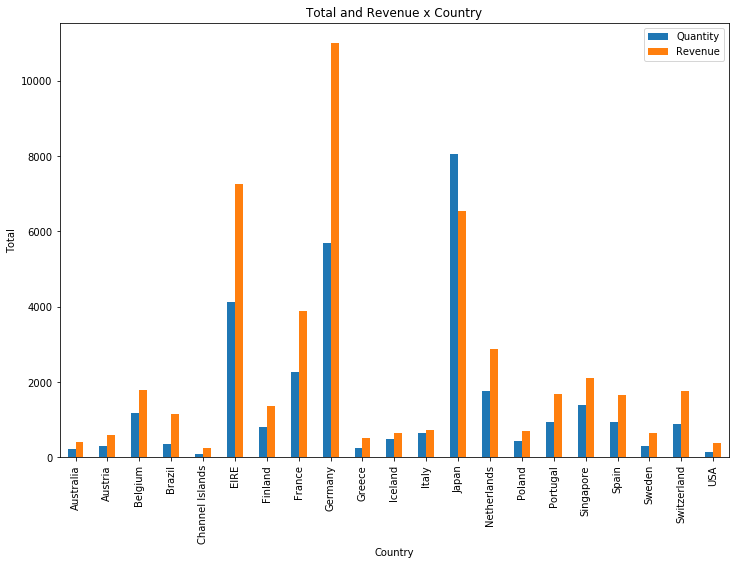

In [25]:
#interactive bar chart

total.plot(kind='bar', figsize=(12,8))
plt.title('Total and Revenue x Country')
plt.ylabel('Total')
plt.xlabel('Country')

plt.show()

## 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

In [26]:
#filtering France and period
may = data[(data['InvoiceDate'] >='2011-01-01') &
            (data['InvoiceDate'] < '2011-05-31') &
            (data['Country'] == 'France')]

In [36]:
#Groupby by qty and revenue
total_france = may.groupby(['InvoiceDate'])[['Quantity','Revenue']].sum()

In [37]:
total_france

,Quantity,Revenue
InvoiceDate,,
2011-01-05 12:42:00,359,502.07
2011-01-05 14:48:00,369,763.11
2011-01-06 14:26:00,261,283.77
2011-01-06 16:12:00,177,425.25
2011-01-07 12:07:00,488,676.16
2011-01-07 13:13:00,103,298.93
2011-01-09 12:46:00,78,114.00
2011-01-10 13:22:00,628,1112.06
2011-01-11 07:57:00,168,144.00


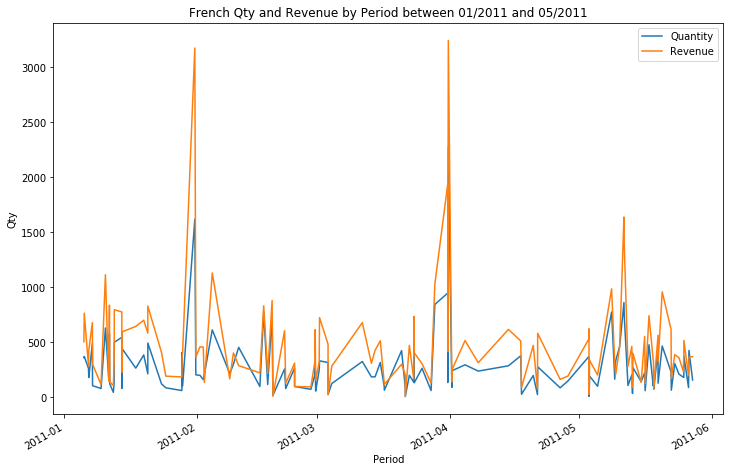

In [41]:
#Line chart
total_france.plot(kind='line', figsize=(12,8))
plt.title('French Qty and Revenue by Period between 01/2011 and 05/2011')
plt.xlabel('Period')
plt.ylabel('Qty')

plt.show()

## 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

In [42]:
data

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.20,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.60,13408,United Kingdom
5,536396,2010-12-01 10:51:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
6,536401,2010-12-01 11:21:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,2.95,11.80,15862,United Kingdom
7,536406,2010-12-01 11:33:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,8,2.55,20.40,17850,United Kingdom
8,536502,2010-12-01 12:36:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,16552,United Kingdom
9,536520,2010-12-01 12:43:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,2.95,8.85,14729,United Kingdom


In [44]:
#filter description

party = data[(data['Description'] == 'PARTY BUNTING')]

In [52]:
#groupby by description and average 

avg = party.groupby(['Country'])[['Quantity','UnitPrice']].mean()

In [53]:
avg

,Quantity,UnitPrice
Country,,
Australia,33.125000,4.712500
Austria,8.000000,4.950000
Belgium,4.000000,4.950000
Channel Islands,13.333333,4.950000
Cyprus,2.333333,4.750000
Denmark,12.000000,4.950000
EIRE,21.210526,4.739474
Finland,6.000000,4.950000
France,5.727273,4.922727


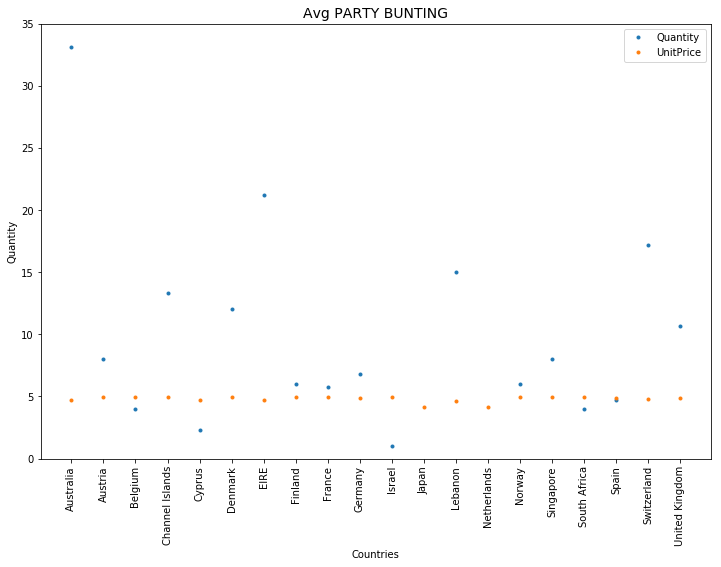

In [75]:
avg.plot(style='.', figsize=(12,8))
plt.xticks(list(range(20)),['Australia','Austria','Belgium','Channel Islands','Cyprus','Denmark','EIRE','Finland',
                            'France','Germany','Israel','Japan','Lebanon','Netherlands','Norway','Singapore',
                           'South Africa','Spain','Switzerland','United Kingdom'], rotation='vertical')
plt.ylim([0,35])
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('Avg PARTY BUNTING', fontsize=14)

plt.show()

## 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

In [76]:
data.head(1)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom


In [92]:
countries = ['EIRE', 'Germany', 'France', 'Netherlands'];
invoice_countries = data[data['Country'].isin(countries)];
invoice_countries = invoice_countries[['InvoiceNo', 'Quantity', 'Country']].pivot_table(index='InvoiceNo', 
                                                                      columns='Country', 
                                                                      values='Quantity', 
                                                                      aggfunc='sum');

In [93]:
invoice_countries

Country,EIRE,France,Germany,Netherlands
InvoiceNo,,,,
536370,NaN,446.0,NaN,NaN
536403,NaN,NaN,NaN,96.0
536527,NaN,NaN,156.0,NaN
536540,230.0,NaN,NaN,NaN
536541,12.0,NaN,NaN,NaN
536803,6.0,NaN,NaN,NaN
536840,NaN,NaN,147.0,NaN
536852,NaN,106.0,NaN,NaN
536861,NaN,NaN,76.0,NaN


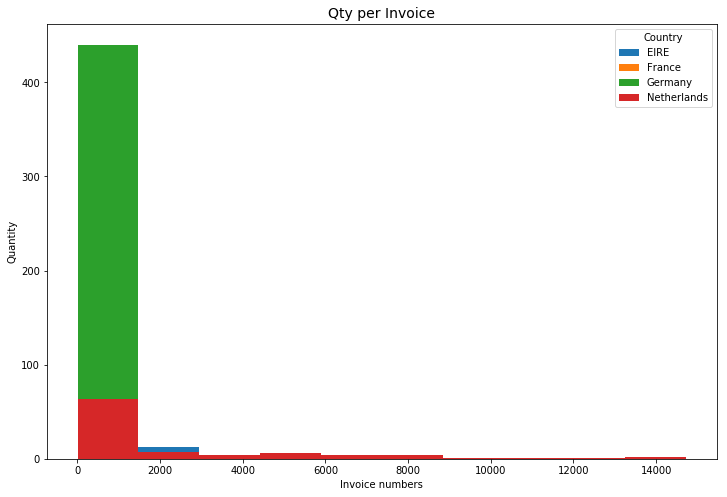

In [96]:
#histograms plot

invoice_countries.plot(kind='hist', figsize=(12,8))
plt.xlabel('Invoice numbers')
plt.ylabel('Quantity')
plt.title('Qty per Invoice', fontsize=14)

plt.show()

## 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

In [97]:
product_list = ['JUMBO BAG RED RETROSPOT', 
                'CREAM HANGING HEART T-LIGHT HOLDER',
                'REGENCY CAKESTAND 3 TIER']

country_list = ['EIRE', 'Germany', 'France', 'Netherlands']

In [98]:
data.head(1)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom


In [108]:
#filter 
country_rev = data[(data['Country'].isin(country_list)) &
            (data['Description'].isin(product_list))]
country_rev

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
179,539320,2010-12-16 19:16:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,24,2.95,70.80,14911,EIRE
198,539722,2010-12-21 13:45:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,24,2.95,70.80,14911,EIRE
304,541570,2011-01-19 12:34:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,256,2.55,652.80,14646,Netherlands
322,541979,2011-01-24 14:54:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14911,EIRE
367,542777,2011-02-01 08:31:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14911,EIRE
393,543114,2011-02-03 13:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.60,14156,EIRE
447,544210,2011-02-17 11:01:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14911,EIRE
464,544690,2011-02-23 08:48:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.60,14156,EIRE
514,545657,2011-03-04 14:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14911,EIRE
534,546027,2011-03-09 08:09:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,12,2.95,35.40,12759,Netherlands


In [109]:
country_rev = country_rev.pivot_table(index='Country',
                                     columns='Description',
                                     values='Revenue', aggfunc='sum')


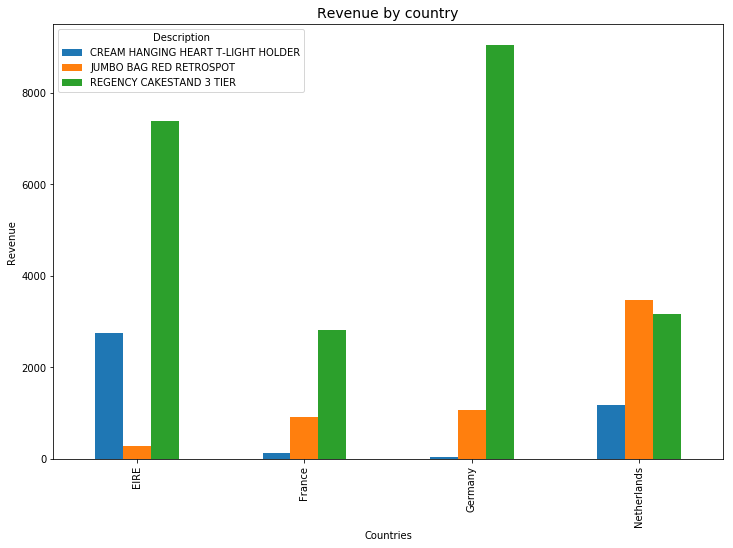

In [113]:
country_rev.plot(kind='bar',figsize=(12,8))


plt.xlabel('Countries')
plt.ylabel('Revenue')
plt.title('Revenue by country', fontsize=14)

plt.show()

## 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

In [3]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day
uk = data[data['Country']=='United Kingdom']

In [4]:
data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country,Year,Month,Day
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom,2010,12,1
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom,2010,12,1
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom,2010,12,1
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom,2010,12,1
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom,2010,12,1


In [6]:
# Variables
years = uk['Year'].unique();
months = uk['Month'].unique();
months.sort();

In [7]:
# Interactive menu
@interact(year=years, 
          month=months)

# Update function
def linechart(year=2011, month=4):
    # Transform the data
    sales_date = uk[(uk['Year']==year) & (uk['Month']==month)];
    sales_day = sales_date.groupby('Day').sum()['Quantity'];
    # Traces
    traces = [go.Scatter(x=sales_day.index, y=sales_day)];
    # Layout
    layout = go.Layout(width=1000, height=500,
                       xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Day')),
                       yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Quantity')),
                       title=go.layout.Title(text=f'Total Quantity sold in UK ({month}-{year})'));
    # Plot
    py.iplot(go.Figure(data=traces, layout=layout));

interactive(children=(Dropdown(description='year', index=1, options=(2010, 2011), value=2011), Dropdown(descri…

## 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

In [8]:
agg_func = {'InvoiceNo':'nunique',
            'Quantity':'sum',
            'UnitPrice':'mean',
            'Revenue':'sum',
            'CustomerID':'nunique'}

products = uk.groupby('Description').agg(agg_func)

In [ ]:
# Interactive menu
@interact(invoices=(products['InvoiceNo'].min(), products['InvoiceNo'].max(), 10), 
          customers=(products['CustomerID'].min(), products['CustomerID'].max(), 10))

# Update function
def scatter(invoices=1, customers=1):
    # Transform the data
    filtered = products[(products['CustomerID'] > customers) & 
                  (products['InvoiceNo'] > invoices)]
    # Traces
    traces = [go.Scatter(x=filtered['InvoiceNo'], 
                         y=filtered['CustomerID'], 
                         mode='markers')]
    # Layout 
    layout = go.Layout(width=700, height=600,
                       xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='#Invoices')),
                       yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='#Customers')),
                       title=go.layout.Title(text='Number of Invoices VS Number of Customers'));
    # Plot
    py.iplot(go.Figure(data=traces, layout=layout));

## 8. Creat an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.

In [ ]:
# Interactive menu
@interact(product='')

# Update function
def chart(product):
    # Transform the data
    filtered = data[data['Description'].str.contains(product.upper())]
    prdct_rvn = filtered.groupby('Description')['Revenue'].sum()
    # Traces
    traces = [go.Bar(x=prdct_rvn.index, y=prdct_rvn)];
    # Layout
    layout = go.Layout(width=1000, height=500,
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Total Revenue')),
                   title=go.layout.Title(text='Total Revenue per Product'));
    # Plot
    py.iplot(go.Figure(data=traces, layout=layout));